# CIFAR-10 Images

Exploring the CIFAR 10 image dataset

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict1 = pickle.load(fo, encoding='bytes')
    return dict1
 
pd_tr = pd.DataFrame()
tr_y = pd.DataFrame()
 
for i in range(1,6):
    data = unpickle('/Users/holliknight/Downloads/cifar-10-batches-py-1/data_batch_' + str(i))
    pd_tr = pd_tr.append(pd.DataFrame(data[b'data']))
    tr_y = tr_y.append(pd.DataFrame(data[b'labels']))
    pd_tr['labels'] = tr_y

tr_x = np.asarray(pd_tr.iloc[:, :3072])
tr_y = np.asarray(pd_tr['labels'])
ts_x = np.asarray(unpickle('/Users/holliknight/Downloads/cifar-10-batches-py-1/test_batch')[b'data'])
ts_y = np.asarray(unpickle('/Users/holliknight/Downloads/cifar-10-batches-py-1/test_batch')[b'labels'])    
labels = unpickle('/Users/holliknight/Downloads/cifar-10-batches-py-1/batches.meta')[b'label_names']

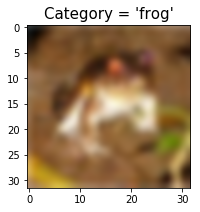

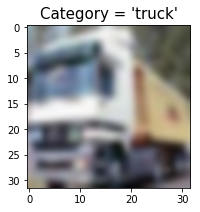

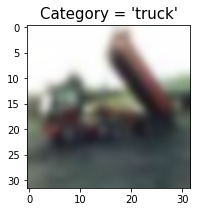

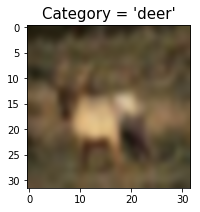

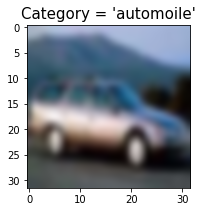

In [28]:
def plot_CIFAR(ind):
    arr = tr_x[ind]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
 
    img = np.dstack((R,G,B))
    title = re.sub('[!@#$b]', '', str(labels[tr_y[ind]]))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = '+ title,fontsize =15)

plot_CIFAR(0)
plot_CIFAR(1)
plot_CIFAR(2)
plot_CIFAR(3)
plot_CIFAR(4)

In [52]:
pd_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
